# Plot 1 wf from each channel All boards

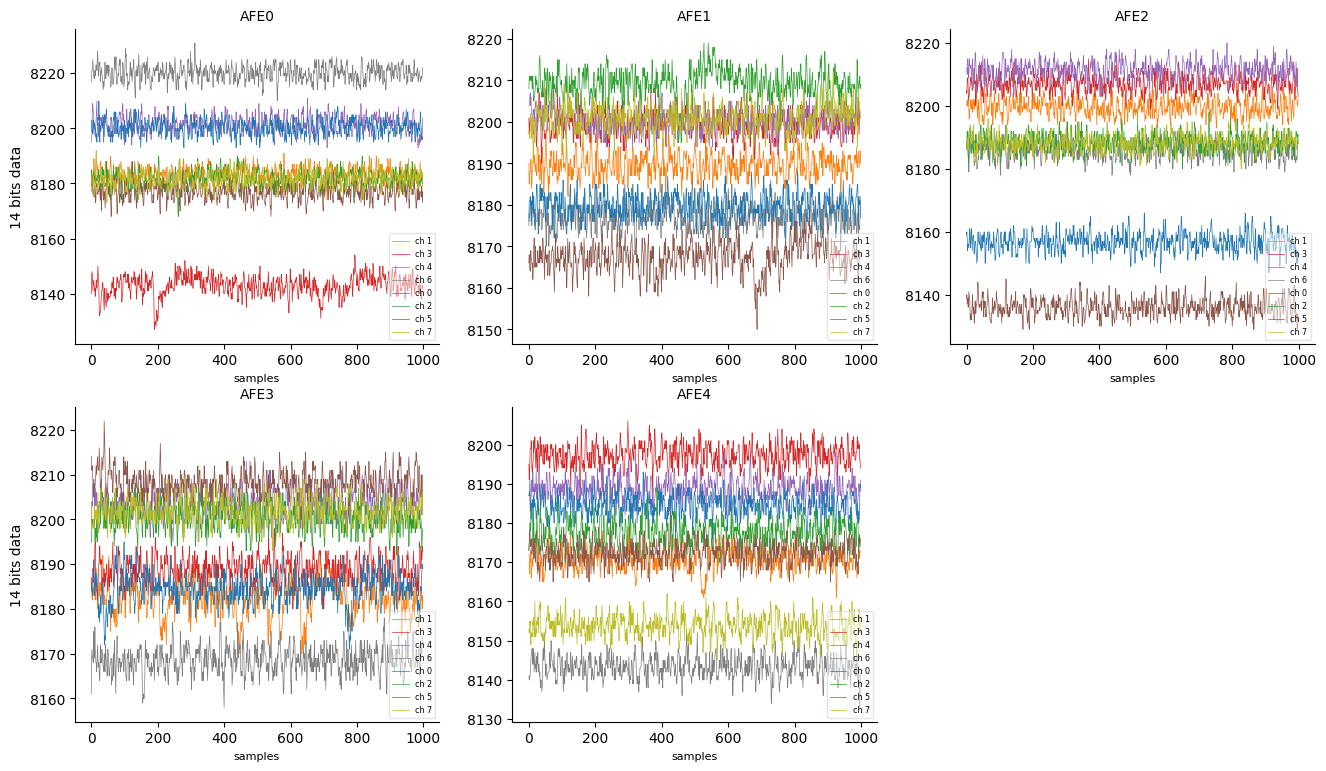

Waveforms  from IP Address 10.73.137.111


In [9]:
from oei import *
import numpy as np 
import matplotlib.ticker as tk
import matplotlib.pyplot as plt
import time

def main():

    daphne_ip_endpoint = 111

    channels = [1,3,4,6,0,2,5,7]
    AFEs = [0,1,2,3,4]
   
    if len(AFEs) == 1:
        figsize = (7,5)
        nrows, ncols = 1, 1
    elif len(AFEs) == 2:
        figsize = (14,5)
        nrows, ncols = 1, 2
    elif len(AFEs) == 3:
        figsize = (16.5, 4)
        nrows, ncols = 1, 3
    elif len(AFEs) >= 4:
        figsize = (16, 9)
        nrows, ncols = 2, 3
    
    plt.ion()
    base_register = 0x40000000
    AFE_hex_base = 0x100000
    Channel_hex_base = 0x10000
         
    do_software_trigger = True
    
    
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:gray', 'tab:olive']
   # while keep_plotting:
    #for t in [104,105,107,109,111,112,113]:
    for t in [daphne_ip_endpoint]:
        thing = OEI(f"10.73.137.{t}")
        # print(hex(thing.read(0x6100,1)[2])) # trigger SPI buffer
        total_time = 0
        fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=False, sharey=False, figsize=figsize)
        if len(AFEs) == 1:
            axes = [axes]
        if do_software_trigger:
            thing.write(0x2000,[1234]) # trigger SPI buffer
        # this list of lists is used to store waveform data
        rec = [[] for i in range(len(channels))]
        # loop through AFEs, grab waveforms from channels and plot
        
        for g,AFE in enumerate(AFEs):
            start = time.time()
            # this list of lists is used to store waveform data
            rec = [[] for i in range(len(channels))]
            for i in range (20):
                for d,channel in enumerate(channels):
                    doutrec = thing.read(base_register+(AFE_hex_base * AFE)+(Channel_hex_base * channel)+i*50,50)
                    for word in doutrec[2:]:
                        rec[d].append(word)
            end = time.time()
            total_time += end-start
            #print('Time to acquire: ', end-start)
            for d,channel in enumerate(channels):
                if len(AFEs) <= 3:
                    plot = axes[g]
                    if g == 0:
                        plot.set_ylabel('14 bits data')
                else:
                    if g < 3:
                        plot = axes[0,g]
                        if g == 0:
                            plot.set_ylabel('14 bits data')
                    else:
                        plot = axes[1, g-3]
                        if g == 3:
                            plot.set_ylabel('14 bits data')
                
                plt.yticks(np.arange(min(rec[d])-15,max(rec[d])+15 , step=5))
                # plot.yaxis.set_major_formatter(formatter0)
                # plot.set_ylim(600,15000)
                plot.spines['top'].set_visible(False)
                plot.spines['right'].set_visible(False)
                plot.set_title(f'AFE{AFE}', fontsize=10)
                plot.plot(rec[d][0:-1], linewidth=0.5,color=colors[channel], label=f'ch {channel}')
                plot.set_xlabel('samples', fontsize=8)
                plot.legend(loc='lower right',fontsize='xx-small',framealpha=0.5)
        
        if len(AFEs) == 5:
            axes[1, 2].remove()
        elif len(AFEs) == 4:
            axes[1, 2].remove()
            axes[1, 1].remove()
        plt.show(block=False)
        print(f'Waveforms  from IP Address 10.73.137.{t}')
        # plt.savefig(f'Noise tests ep{t}.png',transparent=True)
        #plt.pause(1)
        thing.close
        # print('Total time to acquire {len(channels) * len(AFEs)} channels is {"%.4f" % total_time} seconds.')
        # user_input = input("Enter 'a' to acquire again, 'q' to quit, or enter a new DAPHNE endpoint address (e.g. 107, 109).\n")
        # if user_input == 'q':
        #    keep_plotting = False
        #    thing.close()
        # elif user_input == 'a':
        #    plt.clf()
        #    continue
        # elif user_input.isnumeric():
        #    plt.clf()
        #    daphne_ip_endpoint = int(user_input)
        # else:
        #    continue 


if __name__ == "__main__":
    main()
